# 決定木(Decision Tree)

## 樹木モデル(Tree-based model)

樹木モデルは非線形回帰分析、非線形判別分析の方法の1つ。回帰問題では回帰木(regression tree)、分類問題では分類木(classification tree)あるいは決定木(decision tree)と呼ばれる。

樹木モデルでは、説明変数の値を何らかの基準をもとに分岐させ、判別・予測のモデルを構築する。
分岐の過程は木構造で図示することができ、IF-THENのような簡単なルールで表す事ができるため、樹木モデルは分類結果に至った理由を人間が見て解釈しやすい。

IF分岐だらけになるため、他の機械学習と違ってカクカクと不連続なパターン分けが階層的に作られていく

## 分類の考え方

ポイントになるのは「不純度(purity)」という概念。個々の分岐に来るごとにできるだけその1回で『集団としてのバラバラさ＝不純度』が大幅に少なくなるようにする。
分岐が進めば進むほど純度が高く綺麗に分類されていくように、樹の枝を茂らせていくというのがアルゴリズムの基本。

※「ある商品を購入するか否か」という問題がある場合、この時分類されたデータが買う、買わないできれいに分けれればそれは純粋である。

### 不純度

不純度を測る指標として以下のものが知られている。

- エントロピー
- ジニ係数

決定木モデルの種類としてCART(Classification And Regression Trees)やC4.5(C5.0)が知られているが、
CARTはジニ係数、C4.5(C5.0)

## 決定木モデルの種類

決定木モデルの種類としてCARTやC4.5(C5.0)などが知られている。

### CART(Classification And Regression Trees)

ジニ係数(不平等さを示す指標。0-1の間で値をとり、0で平等)を基準に分割する。
ノードを分岐させることによって、不純度が減少するような分岐点を探し、ジニ係数が最も低下するように分類する。
純度が増す(=バラツキが少なくなる)

### C4.5(C5.0/See5)

エントロピーを基準に分割を行う。
他にもCARTとの違いとして以下の様なものがある。

- CARTは2分岐しかできないがC4.5は3分岐以上もできる
- CARTは木の剪定をクロスバリデーションによって行うため時間がかかるがC4.5は二項信頼限界を使うため一方行でできる

C4.5は商用のSee5/C5.0に改善された(精度・スケーラビリティの向上)。詳細は[こちら](http://rulequest.com/see5-comparison.html)。

## 決定木の特徴

- 学習したモデルを人間が見て解釈しやすい
- 入力データの正規化がいらない
- カテゴリー変数や欠損値などを入力しても内部で処理してくれる
- 特定の条件下では過学習しやすい傾向にある
- 非線形分離可能だが、線形分離可能な問題は不得意
- クラスごとのデータ数に偏りのあるデータは不得意
- データの小さな変化に対して結果が大きく変わりやすい
- 予測性能はまずまず
- バッチ学習でしか学習できない

---

# 決定木の過学習問題

データを条件分岐で分けていくという性質上、木の深さが深くなると学習に使えるデータが少なくなるため、過学習(over fitting)しやすい傾向にある。
これについては木の深さを少なくしたり枝刈り(剪定, pruning)である程度防ぐことが出来る。

特徴量数が多い時も過学習になりやすいため、その場合は次元削減や特徴選択をしておく必要がある。
ダミーデータに対してその決定境界(decision boundary)を見てみる

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import plotting
import datasets as datasets_utils

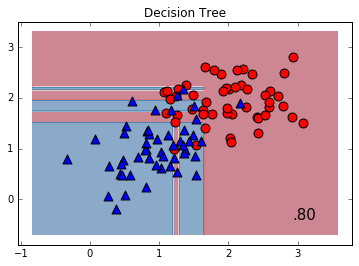

In [7]:
clf = tree.DecisionTreeClassifier()
df = datasets_utils.generate_linearly_separable_dataset(50)
plotting.plot_result(clf, 'Decision Tree', df)
plt.show()

どちらも過学習気味であることが見て取れる。

---

# ランダムフォレスト(Random Forest)

CARTの開発者でもある Leo Breimanが2001年にRandom Forestというアルゴリズムを提案した。
これは利用する特徴量の組み合わせを色々用意して、性能がよかった学習記複数の予測結果を多数決で統合。
複数の木を独立に学習させるため、並列で学習が可能である。

ランダムフォレストのような複数の学習結果を組み合わせる手法をアンサンブル学習(Ensemble Learning)という。
単純な決定木ではデータの追加を行うと学習結果が大きく変わるのに対して、ランダムフォレストなどは学習結果が安定しやすくなるといったメリットが有る。また予測性能もアンサンブルをしたほうがより良くなることが知られている。

### Iris Dataset

アイリス(アヤメ)の花に関するデータセット。アイリスにはいくつかの種類があり、このデータセットは3つの異なる品種のサンプルデータから構成されている。最近だとゲノム配列により種の特定が出来ますが、このデータセットが使われ始めた1930年頃はDNAが解明されておらず、花の形状から分類していました。

アイリスのデータ・セットには次の4つの要素と花の品種が記録されています。

- がく片の長さ (Sepal length)
- がく片の幅 (Sepal width)
- 花弁の長さ (Petal length)
- 花弁の幅 (Petal width)

[scikit-learnの中にアイリスのデータセットが含まれている](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)ため、そちらを使用しましょう。

In [5]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
print(iris.target_names)
df[:4]

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


アイリスのデータセットには150個のサンプルが含まれているため、その中からランダムに100個取り出したものを訓練データとして使用する。

In [6]:
train = df.sample(100)
test = df.ix[set(df.index) - set(train.index)]

train_data = train[train.columns[0:4]]
test_data = test[test.columns[0:4]]
train_target = train['species']
test_target = test['species']

In [7]:
estimator = RandomForestClassifier(n_estimators=100)
model = estimator.fit(train_data, train_target)
test_ans = model.predict(test_data)

In [8]:
metrics.adjusted_rand_score(test_target, test_ans)

0.8266089939592811

正解率(accuracy): モデルが正しく分類できた割合

### Visualize the random forest

決定木の特徴として人間が分かりやすいというのが挙げられる。今作成した決定木を可視化してみる。

In [6]:
len(estimator.estimators_)

100

In [7]:
tree.export_graphviz(estimator.estimators_[0], out_file="tree.dot")

In [9]:
!dot -Tpng tree.dot -o tree.png

<img style="width: 500px;" src="./tree.png" />
<!-- ![RandomTreeの木構造](tree.png) -->

このモデルがどのように判断しているのかが図から確認できる。
また最終的にはジニ係数が0となっていることも分かる。

## 参考文献

- [Rによるデータサイエンス](http://www.amazon.co.jp/dp/4627096011)
- [chezou/notebooks](https://github.com/chezou/notebooks/blob/master/classification.ipynb)
- [機械学習ハンズオン](http://jaistlt.connpass.com/event/17739/)
- [Python (programming language): How can I visualize the forests created by random forests in python?](https://www.quora.com/Python-programming-language-How-can-I-visualize-the-forests-created-by-random-forests-in-python)
- [パッケージユーザーのための機械学習(1)：決定木](http://tjo.hatenablog.com/entry/2013/11/21/194654)
- [データマイニングで使われるトップ10アルゴリズム](http://d.hatena.ne.jp/isseing333/20111123/1322053940)
- [パターン認識 第10章 決定木](http://www.slideshare.net/miyoshiyuya/10)